In [1]:
import json
import pandas as pd
#import reddit api query script
from RedditAnalyzer.data.get_data import RedditScraper
from RedditAnalyzer.topics.analyze_text import CreateTopicModel
from RedditAnalyzer.topics.visualizations import text_plots
from RedditAnalyzer.generation.topic_info import TopicModelInfoGeneration

#read app info
with open('../keys/reddit_app.json') as rd_f:
    data = json.load(rd_f)
    
with open('../keys/open-ai.json') as rd_f:
    data['OPENAI_API_KEY'] = json.load(rd_f)['OPENAI_API_KEY']

Extract Data from Reddit

In [2]:
#subreddit to create topic model for
subreddit = 'Pokemon'

#log into to reddit api and custom scraper using app credentials
reddit = RedditScraper(client_id=data['client'], client_secret=data['secret'], user_agent=data['user'])

#use custom scraper and subreddit posts function to query from channel
top_week = reddit.subreddit_posts(subreddit, time_filt='week', with_comments=False)
top_week[:2]

Display Name: Pokemon
Title: Pokémon: Gotta Catch 'Em All!
Posts: 806 | Comments: 0


,text,uid,score,pid,created,parent
0,I know what you are..,197jal6,15369,197jal6,1.705351e+09,1
1,Let’s hope the Pecharunt Event is a sign of ch...,19826w5,6688,19826w5,1.705409e+09,1


Visualizations

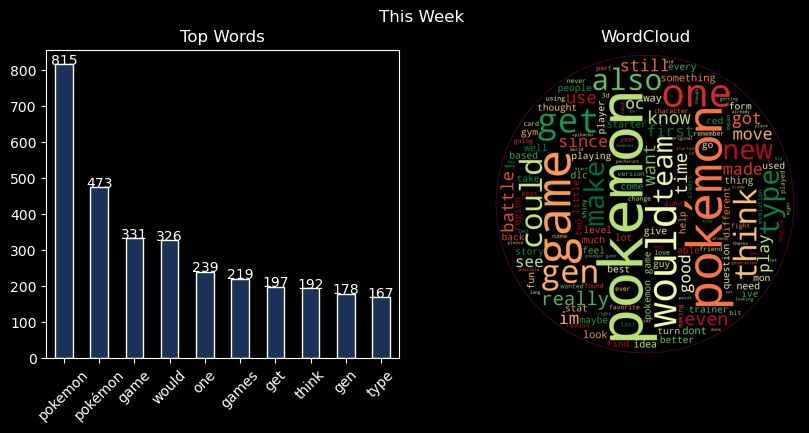

In [3]:
text_plots(top_week['text'], 'Top Words', 'WordCloud')

Weekly Topics

In [6]:
#total trials for optuna to iterate through
num_trials = 60

#instantiate topic modeling class for weekly data
topic_modeler = CreateTopicModel(df=top_week, column_name='text', use_hdbscan=False)

#create topic model for dataset and tune hyperparameters of model
original_df, topics, topic_model = topic_modeler.find_hyperparams(num_trials=num_trials)
#show topic labels
print(topic_model.generate_topic_labels())
original_df.groupby('topic').agg({'text': len}).T

['0_oc_oc oc_commission', '1_tattoo_crocheted_card', '2_game_think_like', '3_team_pokemon_starter', '4_oc_draw_drawing', '5_pikachu_https_pokemon', '6_art_pokemon_pokémon', '7_type_starters_pokémon', '8_game_games_played', '9_dog_kyurem_dragon', '10_drew_drawing_monotypes', '11_oc_cosplay_area zero', '12_violet_games_scarlet', '13_gen pokemon_pokemon adding_152', '14_design_sobble_redesigns', '15_nemona_ohko_just', '16_shiny_gen_legendary', '17_pokemon_gym_leader', '18_round_paradox_pokémon', '19_pokemon_fake_games']


topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
text,44,43,42,40,40,35,33,32,30,29,28,28,27,25,24,22,22,22,20,20


In [7]:
#instantiate topic generation class
generator = TopicModelInfoGeneration(openai_key=data['OPENAI_API_KEY'])

#generate titles and summaries of each topic
topics = generator.generate_titles_and_summaries(dataframe=topics)

In [8]:
for i in range(len(topics)):
    print(f"Topic {i}: {topics['title'][i]}\n\n")
    print(f"Summary: {topics['summary'][i]}\n\n")
    print('*'*100)

Topic 0: "OC and Commission Posts featuring Ceruledge"


Summary: The users within these posts are discussing various topics related to Pokémon. They are sharing their original artwork, including drawings of Pokémon and gijinkas (humanized versions of Pokémon). Some users are also discussing their Pokémon-themed projects, such as creating logos and remixing battle themes. Overall, the posts revolve around fan art, creative projects, and appreciation for Pokémon.


****************************************************************************************************
Topic 1: "Pokémon Tattoos, Crocheted Crafts, and Cards"


Summary: The users in these Reddit posts are discussing various topics related to Pokémon. These topics include sharing Pokémon tattoos, artwork, crafts, and collectibles. Users are also sharing stories about receiving Pokémon cards as gifts and finding old Pokémon items. Overall, the posts revolve around the users' love for Pokémon and their creative expressions of it.

Monthly Topics

In [9]:
#use custom scraper and subreddit posts function to query from channel
top_month = reddit.subreddit_posts(subreddit, time_filt='month', with_comments=False)

#remove posts that are also in top_week
top_month = top_month.loc[~top_month['pid'].isin(top_week['pid'].tolist())].reset_index(drop=True)
top_month[:2]

Display Name: Pokemon
Title: Pokémon: Gotta Catch 'Em All!
Posts: 997 | Comments: 0


,text,uid,score,pid,created,parent
0,these pokemon will always come back to you [OC].,18l8z0c,15872,18l8z0c,1.702907e+09,1
1,Best Pokeballs to use depending on the turn!.,18oi9gz,11260,18oi9gz,1.703261e+09,1


In [10]:
#instantiate topic modeling class for monthly data
topic_modeler = CreateTopicModel(df=top_month, column_name='text', use_hdbscan=False)

#create topic model for dataset and tune hyperparameters of model
original_df_m, topics_m, topic_model_m = topic_modeler.find_hyperparams(num_trials=num_trials)
#show topic labels
print(topic_model_m.generate_topic_labels())
original_df_m.groupby('topic').agg({'text': len}).T

['0_art_oc_drew', '1_pokemon_type_pokémon', '2_tattoo_christmas_charmander', '3_game_pokemon_like', '4_pokemon_pokémon_drawing', '5_oc_love_don', '6_pokemon_water_step', '7_oc_paradox_synchro', '8_oc_oc oc_oc paras', '9_christmas_happy_year', '10_trend_late_right', '11_pokemon_151_fusing gen']


topic,0,1,2,3,4,5,6,7,8,9,10,11
text,84,79,75,72,70,66,62,62,55,42,38,37


In [11]:
#generate titles and summaries of each topic
topics_m = generator.generate_titles_and_summaries(dataframe=topics_m)

In [12]:
for i in range(len(topics_m)):
    print(f"Topic {i}: {topics_m['title'][i]}\n\n")
    print(f"Summary: {topics_m['summary'][i]}\n\n")
    print('*'*100)

Topic 0: Pokemon Fan Art and Drawings


Summary: The users in these Reddit posts are discussing their fanart and artwork related to Pokémon. They share their creations, including drawings, paintings, and digital art, featuring various Pokémon species. The posts also mention the users' personal experiences, such as making art for loved ones or trying new techniques. Overall, the discussion revolves around the users' passion for Pokémon and their creative expressions through art.


****************************************************************************************************
Topic 1: "Favorite Gen 9 Pokemon and Missed Opportunities"


Summary: The users in the sub-reddit channel are discussing various topics related to the Pokemon franchise. Some of the topics include favorite Gen 9 Pokemon, missed opportunities in the Pokemon games, desired type combinations for new Pokemon, suggestions for a new type in the 10th generation, frustrations with trade evolutions, opinions on overhate

Compare Topics

In [13]:
from scipy.spatial.distance import cosine
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

#cosine similarity function
def cosine_sim(x, y):
    return 1 - cosine(x, y)

In [15]:
#encode keywords for each topic and then take the average of the embeddings
topics['keyword_encoding'] = [model.encode(top).mean(axis=0) for top in topics['key_words']]
topics_m['keyword_encoding'] = [model.encode(top).mean(axis=0) for top in topics_m['key_words']]

#compare week topics to month topics
high_sim = []
for x in range(len(topics)):
    for y in range(len(topics_m)):
        sim = cosine_sim(topics['keyword_encoding'][x], topics_m['keyword_encoding'][y])
        if sim > 0.825:
            high_sim.append((x, y, sim))

Repeat Topics This Week

In [16]:
#save high similarity topics into dataframe
sim_df = pd.DataFrame([(
    topics['title'][sim[0]], topics_m['title'][sim[1]], sim[2]) for sim in high_sim], columns=['topic_week', 'topic_month', 'sim'])
sim_df

,topic_week,topic_month,sim
0,"""Future Pokémon Games and Discussions""","""Favorite Gen 9 Pokemon and Missed Opportunities""",0.848720
1,"""Future Pokémon Games and Discussions""","""Pokemon Games: Models, Double Battles, Future...",0.958201
2,"""Future Pokémon Games and Discussions""","""Pokemon Water Type Step Discussions""",0.855085
3,User-generated Pokémon Art and Discussion,Pokemon Fan Art and Drawings,0.875983
4,"""Pokemon Art and Drawing Projects""","""Pokemon Drawing, Map, and 3D""",0.853591
5,Pokémon Forms and Evolution Discussions,"""Favorite Gen 9 Pokemon and Missed Opportunities""",0.850647
6,Pokémon Forms and Evolution Discussions,"""Pokemon Water Type Step Discussions""",0.878819
7,Choosing Pokémon Games for Switch,"""Pokemon Games: Models, Double Battles, Future...",0.860249
8,Improving Art Skills through Drawing,Pokemon Fan Art and Drawings,0.829279
9,"""Gen 1 Pokemon Fusion Progress""","""Gen 1 Pokemon Fusion Updates""",0.878158


In [17]:
print(set(sim_df['topic_week']))

{'User-generated Pokémon Art and Discussion', '"Pokemon Art and Drawing Projects"', 'Improving Art Skills through Drawing', 'Choosing Pokémon Games for Switch', 'Pokémon Forms and Evolution Discussions', '"Gen 1 Pokemon Fusion Progress"', '"Future Pokémon Games and Discussions"'}


New Topics This Week

In [19]:
#topics that were represented in the month and week dataset
repeat_topics = set([tup[0] for tup in high_sim])

#topics that are new in the most recent dataset
new_topics = set([top for top in topics['topic'].unique() if top not in repeat_topics])
new_topic_labels = [topics['title'][top] for top in new_topics]
print(new_topic_labels)

['"OC and Commission Posts featuring Ceruledge"', '"Pokémon Tattoos, Crocheted Crafts, and Cards"', 'Pokemon Team Building Tips and Ideas', '"Pokemon and Pikachu Discussions and Videos"', 'Original Dragon: Dog or Horse?', '"Pokemon Fanart, Cosplay, and Area Zero"', 'Opinions on Scarlet and Violet Games', 'Pokémon Redesigns and Sugimori Style', '"Discussion: Nemona, OHKO, and Egypt"', '"Controversial Pokemon Rankings and Shiny Hunting"', 'Pokemon: Gym Leaders, TMs, and Team Rocket', 'Paradox Pokémon Naming Game and Eliminations', 'Pokemon: Lost Cards, Fake Games']
